In [81]:
# project uses the caltech101 dataset found here https://data.caltech.edu/records/mzrjq-6wc02

%pip install tensorflow
%pip install keras
%pip install matplotlib
%pip install tensorflow_datasets
%pip install numpy
%pip install seaborn
%pip install scikit-learn

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Le'ts inspect the data

In [82]:
train_data, val_data, test_data = tfds.load('caltech101', split=['train[:80%]', 'train[80%:]', 'test'], shuffle_files=True, as_supervised=True)

print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

info = tfds.builder('caltech101').info
class_names = info.features['label'].names
print(f"Total classes: {len(class_names)}")



Training set size: 2448
Validation set size: 612
Test set size: 6084
Image shape: (297, 300, 3)
Label: 10
Total classes: 102


### print some image samples

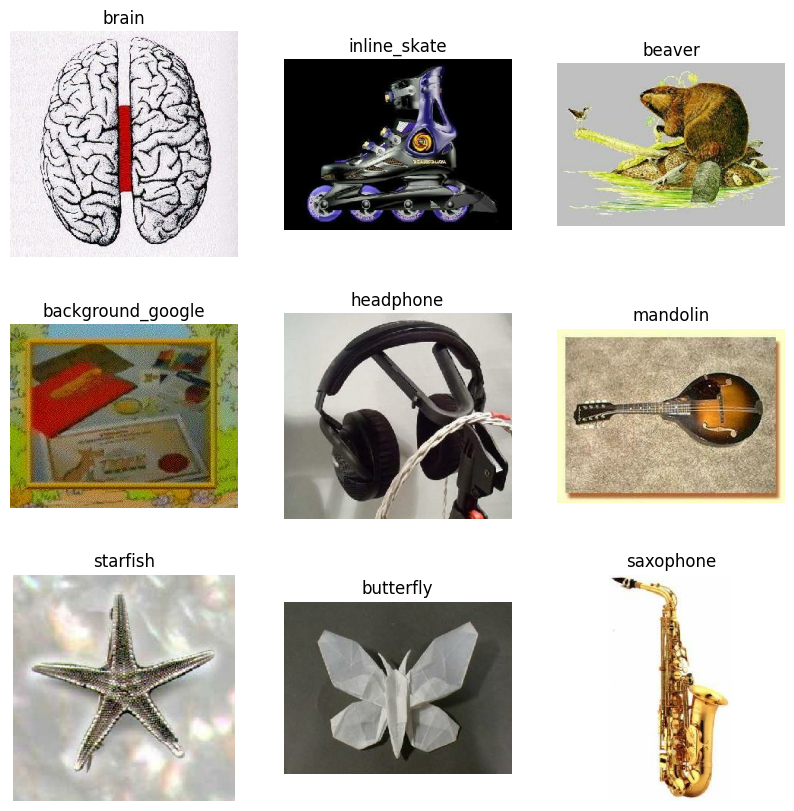

In [83]:
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

### let's see how many data points do we have per class

In [84]:

import collections
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)


Counter({54: 29, 46: 28, 16: 28, 47: 27, 40: 27, 52: 27, 58: 27, 72: 27, 98: 27, 96: 27, 55: 27, 29: 27, 27: 27, 100: 27, 21: 27, 94: 26, 43: 26, 15: 26, 74: 26, 59: 26, 30: 26, 84: 26, 75: 26, 20: 26, 0: 26, 51: 25, 7: 25, 45: 25, 97: 25, 36: 25, 73: 25, 17: 25, 44: 25, 65: 25, 81: 25, 31: 25, 77: 25, 89: 25, 83: 25, 4: 24, 13: 24, 70: 24, 8: 24, 92: 24, 23: 24, 25: 24, 39: 24, 50: 24, 12: 24, 9: 24, 28: 24, 91: 24, 53: 24, 3: 24, 68: 24, 69: 24, 95: 24, 85: 24, 71: 24, 22: 24, 41: 24, 33: 24, 6: 24, 24: 24, 10: 23, 88: 23, 78: 23, 67: 23, 19: 23, 101: 23, 35: 23, 93: 23, 90: 23, 80: 23, 38: 23, 2: 23, 63: 23, 32: 23, 34: 23, 61: 22, 87: 22, 79: 22, 26: 22, 56: 22, 48: 22, 42: 22, 5: 22, 14: 22, 11: 22, 66: 22, 99: 21, 60: 21, 1: 21, 64: 21, 18: 21, 37: 21, 76: 20, 82: 20, 86: 20, 57: 19, 62: 19, 49: 18})


### getting our class names

In [85]:
# Print all label names
print("Class Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Class Names:
0: accordion
1: airplanes
2: anchor
3: ant
4: background_google
5: barrel
6: bass
7: beaver
8: binocular
9: bonsai
10: brain
11: brontosaurus
12: buddha
13: butterfly
14: camera
15: cannon
16: car_side
17: ceiling_fan
18: cellphone
19: chair
20: chandelier
21: cougar_body
22: cougar_face
23: crab
24: crayfish
25: crocodile
26: crocodile_head
27: cup
28: dalmatian
29: dollar_bill
30: dolphin
31: dragonfly
32: electric_guitar
33: elephant
34: emu
35: euphonium
36: ewer
37: faces
38: faces_easy
39: ferry
40: flamingo
41: flamingo_head
42: garfield
43: gerenuk
44: gramophone
45: grand_piano
46: hawksbill
47: headphone
48: hedgehog
49: helicopter
50: ibis
51: inline_skate
52: joshua_tree
53: kangaroo
54: ketch
55: lamp
56: laptop
57: leopards
58: llama
59: lobster
60: lotus
61: mandolin
62: mayfly
63: menorah
64: metronome
65: minaret
66: motorbikes
67: nautilus
68: octopus
69: okapi
70: pagoda
71: panda
72: pigeon
73: pizza
74: platypus
75: pyramid
76: revolver
77: rhino
78: r

### background_google seems to be a garbage class since it contains a lot of images that are just random and not related, let's exclude it from the datasets

Training set size after filtering: 2424
Validation set size after filtering: 606
Test set size after filtering: 5647


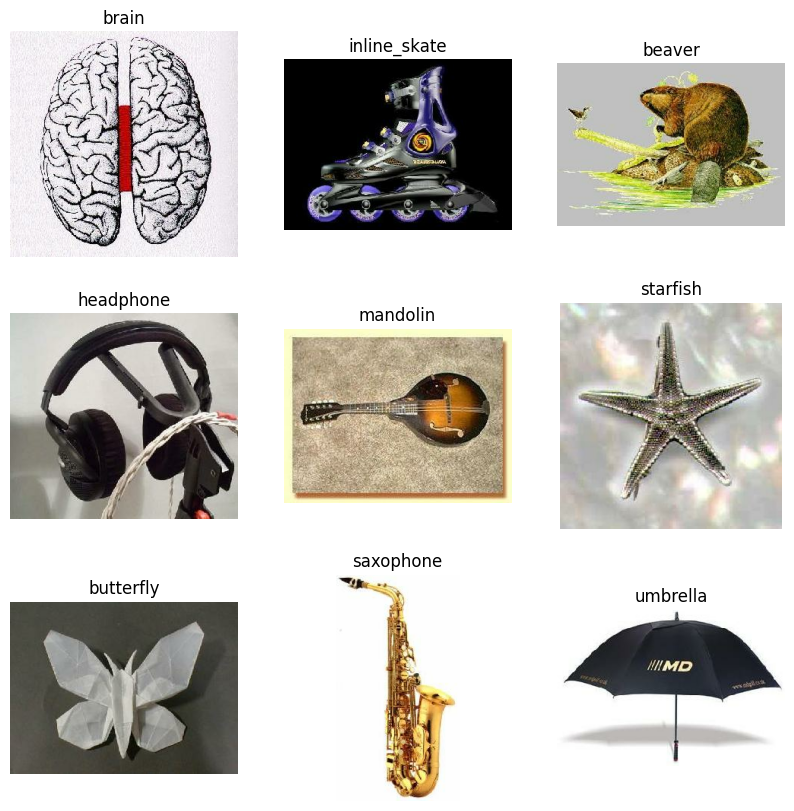

In [86]:
# get class names and find the index of "background_google" class
info = tfds.builder('caltech101').info
class_names = info.features['label'].names
google_background_index = class_names.index("background_google")

# remove "background_google" from the class names list
class_names = [name for name in class_names if name != "background_google"]

def filter_google_background(image, label):
    return tf.not_equal(label, google_background_index)

# filter the garbage class
train_data = train_data.filter(filter_google_background)
val_data = val_data.filter(filter_google_background)
test_data = test_data.filter(filter_google_background)

# adjust labels to account for the removal of "background_google"
def adjust_labels(image, label):
    return image, tf.where(label > google_background_index, label - 1, label)

train_data = train_data.map(adjust_labels)
val_data = val_data.map(adjust_labels)
test_data = test_data.map(adjust_labels)

print(f"Training set size after filtering: {len(list(train_data))}")
print(f"Validation set size after filtering: {len(list(val_data))}")
print(f"Test set size after filtering: {len(list(test_data))}")

fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

### background_google should be gone, all the classes and labels were also adjusted properly

In [87]:
# Print all label names
print("Class Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Class Names:
0: accordion
1: airplanes
2: anchor
3: ant
4: barrel
5: bass
6: beaver
7: binocular
8: bonsai
9: brain
10: brontosaurus
11: buddha
12: butterfly
13: camera
14: cannon
15: car_side
16: ceiling_fan
17: cellphone
18: chair
19: chandelier
20: cougar_body
21: cougar_face
22: crab
23: crayfish
24: crocodile
25: crocodile_head
26: cup
27: dalmatian
28: dollar_bill
29: dolphin
30: dragonfly
31: electric_guitar
32: elephant
33: emu
34: euphonium
35: ewer
36: faces
37: faces_easy
38: ferry
39: flamingo
40: flamingo_head
41: garfield
42: gerenuk
43: gramophone
44: grand_piano
45: hawksbill
46: headphone
47: hedgehog
48: helicopter
49: ibis
50: inline_skate
51: joshua_tree
52: kangaroo
53: ketch
54: lamp
55: laptop
56: leopards
57: llama
58: lobster
59: lotus
60: mandolin
61: mayfly
62: menorah
63: metronome
64: minaret
65: motorbikes
66: nautilus
67: octopus
68: okapi
69: pagoda
70: panda
71: pigeon
72: pizza
73: platypus
74: pyramid
75: revolver
76: rhino
77: rooster
78: saxophone
7

### normalize the data and generate new augmented data from the original training set 

In [88]:
import cv2

def resize_image(image, label):
    image = tf.image.resize(image, [128, 128])
    return image, label

train_data = train_data.map(resize_image)
val_data = val_data.map(resize_image)
test_data = test_data.map(resize_image)

def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize_image)
val_data = val_data.map(normalize_image)
test_data = test_data.map(normalize_image)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomZoom(0.15),
    tf.keras.layers.RandomTranslation(0.15, 0.15)
])

def augment_image(image, label):
    image = data_augmentation(image)
    return image, label

def generate_augmented_data(train_data, number_of_augments):
    augmented_datasets = [train_data]  # original data

    for _ in range(number_of_augments):
        augmented_data = train_data.map(augment_image)
        augmented_datasets.append(augmented_data)

    # add new data to original dsta
    full_train_data = augmented_datasets[0]
    for aug_data in augmented_datasets[1:]:
        full_train_data = full_train_data.concatenate(aug_data)

    return full_train_data

train_data = generate_augmented_data(train_data, number_of_augments=2)
train_data_size = len(list(train_data))
train_data = train_data.shuffle(buffer_size=train_data_size)

def edge_detection(image, label):
    image_gray = tf.image.rgb_to_grayscale(image)
    image_gray = tf.expand_dims(image_gray, axis=0)
    edges = tf.image.sobel_edges(image_gray)
    edge_x = edges[..., 0]
    edge_y = edges[..., 1]
    edges = tf.sqrt(tf.square(edge_x) + tf.square(edge_y))
    edges = tf.squeeze(edges, axis=0)
    edges = tf.clip_by_value(edges, 0.0, 1.0)
    return edges, label


# def edge_detection(image, label):
#     # Convert image to grayscale
#     image_gray = tf.image.rgb_to_grayscale(image)

#     # Prewitt kernels
#     kernel_x = tf.constant([[1., 0., -1.],
#                             [1., 0., -1.],
#                             [1., 0., -1.]], dtype=tf.float32)
#     kernel_x = kernel_x[:, :, tf.newaxis, tf.newaxis]

#     kernel_y = tf.constant([[1., 1., 1.],
#                             [0., 0., 0.],
#                             [-1., -1., -1.]], dtype=tf.float32)
#     kernel_y = kernel_y[:, :, tf.newaxis, tf.newaxis]

#     # Apply Prewitt kernels
#     edges_x = tf.nn.conv2d(tf.expand_dims(image_gray, axis=0), kernel_x, strides=[1, 1, 1, 1], padding='SAME')
#     edges_y = tf.nn.conv2d(tf.expand_dims(image_gray, axis=0), kernel_y, strides=[1, 1, 1, 1], padding='SAME')

#     # Compute magnitude of gradients
#     edges = tf.sqrt(tf.square(edges_x) + tf.square(edges_y))
#     edges = tf.clip_by_value(edges, 0.0, 1.0)

#     threshold = 0.25  # Adjust this value as needed
#     edges = tf.where(edges < threshold, threshold, edges)

#     # Squeeze to remove unnecessary dimensions
#     edges = tf.squeeze(edges, axis=0)

#     edges = tf.clip_by_value(edges, 0.0, 1.0)

#     return edges, label

# def edge_detection(image, label):
#     # Ensure the input image is 3D (height, width, channels)
#     if len(image.shape) != 3 or image.shape[-1] != 3:
#         raise ValueError(f"Expected image shape (height, width, 3), got {image.shape}")

#     # Convert image to grayscale
#     image_gray = tf.image.rgb_to_grayscale(image)

#     # Apply Gaussian blur to reduce noise
#     gaussian_kernel = tf.constant([[1., 4., 6., 4., 1.],
#                                    [4., 16., 24., 16., 4.],
#                                    [6., 24., 36., 24., 6.],
#                                    [4., 16., 24., 16., 4.],
#                                    [1., 4., 6., 4., 1.]], dtype=tf.float32) / 256.0
#     gaussian_kernel = gaussian_kernel[:, :, tf.newaxis, tf.newaxis]
#     image_blurred = tf.nn.conv2d(tf.expand_dims(image_gray, axis=0), gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

#     # Prewitt kernels
#     kernel_x = tf.constant([[1., 0., -1.],
#                             [1., 0., -1.],
#                             [1., 0., -1.]], dtype=tf.float32)
#     kernel_x = kernel_x[:, :, tf.newaxis, tf.newaxis]

#     kernel_y = tf.constant([[1., 1., 1.],
#                             [0., 0., 0.],
#                             [-1., -1., -1.]], dtype=tf.float32)
#     kernel_y = kernel_y[:, :, tf.newaxis, tf.newaxis]

#     # Apply Prewitt kernels
#     edges_x = tf.nn.conv2d(image_blurred, kernel_x, strides=[1, 1, 1, 1], padding='SAME')
#     edges_y = tf.nn.conv2d(image_blurred, kernel_y, strides=[1, 1, 1, 1], padding='SAME')

#     # Compute magnitude of gradients
#     edges = tf.sqrt(tf.square(edges_x) + tf.square(edges_y))

#     # Apply threshold to keep only strong edges (you can adjust the threshold value)
#     threshold = 0.15  # Adjust this value as needed
#     edges = tf.where(edges > threshold, edges, tf.zeros_like(edges))

#     # Clip values to [0, 1] for display purposes
#     edges = tf.clip_by_value(edges, 0.0, 1.0)

#     # Squeeze to remove unnecessary dimensions
#     edges = tf.squeeze(edges, axis=0)

#     return edges, label




train_data = train_data.map(edge_detection)
val_data = val_data.map(edge_detection)
test_data = test_data.map(edge_detection)

# batch and prefetch data
train_data = train_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_data = val_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [89]:
for image, label in train_data.take(10):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

Image shape: (32, 128, 128, 1)
Label: [20 71 56 66 98 10 32 94 18 80 54  1 49 97 83 46  7 56 34 55 51 20 30 96
 87 90 21 53 39 90 82  8]
Image shape: (32, 128, 128, 1)
Label: [71 67 82 22 27 63  5 51 87  2 90 14 94 57 16 31 60 88 24 84 19 84 10 79
  8 30 61 91 15 78 89 33]
Image shape: (32, 128, 128, 1)
Label: [ 7  4 15 32 52 20 67 89 27 71 97 25 25  0 20 26 89 98 71 23 51 19 52 83
 72 86 73 51 65 26 18 77]
Image shape: (32, 128, 128, 1)
Label: [ 95  62  95  32  65  13  71  37  33   4  70  73  84  55 100  95  73  59
  11  90  53  14  54  68  99   5  60  41   1  90  41   6]
Image shape: (32, 128, 128, 1)
Label: [35 64  2 78 68  3 31 57 21  1 40 60  0 87 38 58 57 99 98 34 10 23 38  7
 29 66 37 68 89 63 71 41]
Image shape: (32, 128, 128, 1)
Label: [82 17 54 59 98  1 99 99 47 22 84 25 69 66 24 95 35 38 79 86 82 59 42 15
 39 21 76 19 91 85 92 11]
Image shape: (32, 128, 128, 1)
Label: [93 39 91 79 66  9 37  8 83 27 30 84 59 19 13 95 89 28 15 15 13 94 91 87
  8 98 36 93 97 22 48 94]
Image sha

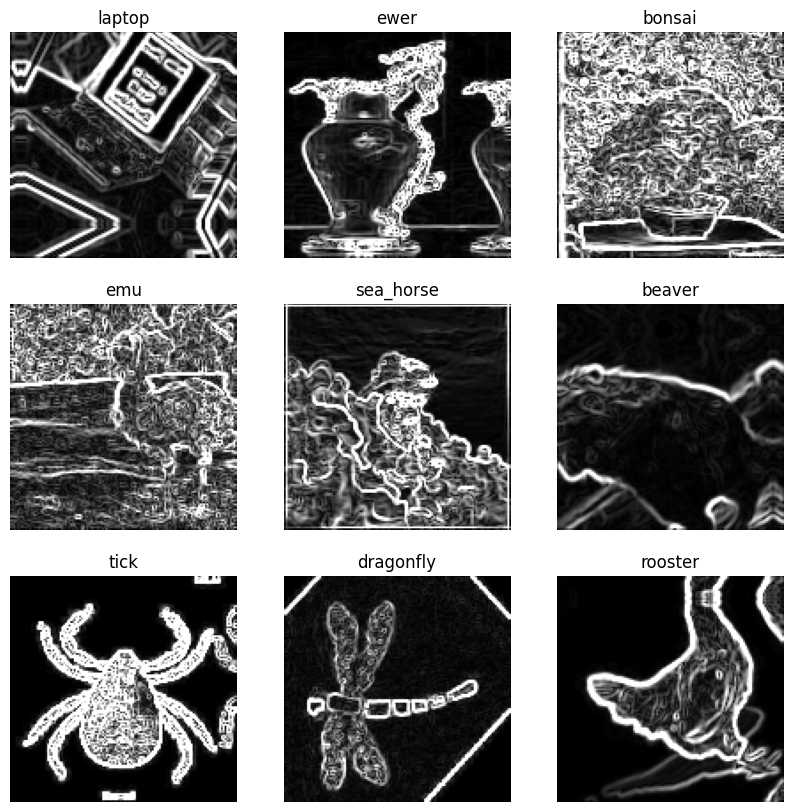

In [90]:
fig = plt.figure(figsize=(10, 10))
for i, (image_batch, label_batch) in enumerate(train_data.take(9)):
    image = image_batch[0].numpy().squeeze()
    label = label_batch[0].numpy()
    
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image, cmap='gray')  
    ax.set_title(class_names[label])
    ax.axis('off')

plt.show()




# fig = plt.figure(figsize=(10, 10))
# for i, (image_batch, label_batch) in enumerate(train_data.take(9)):
#     # Extract the first image in the batch
#     image = image_batch[0].numpy().squeeze()
#     label = label_batch[0].numpy()

#     # Check if image is a single channel and reshape accordingly
#     if len(image.shape) == 2:  # Grayscale image
#         ax = fig.add_subplot(3, 3, i + 1)
#         ax.imshow(image, cmap='gray')
#     elif len(image.shape) == 3 and image.shape[-1] == 1:  # Single channel, with last dimension
#         ax = fig.add_subplot(3, 3, i + 1)
#         ax.imshow(image[..., 0], cmap='gray')
#     else:  # RGB image
#         ax = fig.add_subplot(3, 3, i + 1)
#         ax.imshow(image)

#     ax.set_title(class_names[label])
#     ax.axis('off')

# plt.show()




### utility function to print some performance metrics for the models

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def print_results():
    # extract test images and labels from the test dataset
    test_images, test_labels = zip(*[(image, label) for image, label in tfds.as_numpy(test_data)])
    test_images = np.array([image for batch in test_images for image in batch])
    test_labels = np.array([label for batch in test_labels for label in batch])

    # generate predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # accuracy
    accuracy = accuracy_score(test_labels, predicted_classes)
    print(f"accuracy: {accuracy * 100:.2f}%")

    # precision, Recall, and F1 score (per class and average)
    precision = precision_score(test_labels, predicted_classes, average=None)
    recall = recall_score(test_labels, predicted_classes, average=None)
    f1 = f1_score(test_labels, predicted_classes, average=None)
    print("\nprecision, recall, F1 score for each class:")
    for i, class_name in enumerate(class_names[:101]):  # slice to ensure 101 items
        print(f"{class_name}: Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1 Score={f1[i]:.2f}")

    # average scores
    avg_precision = precision_score(test_labels, predicted_classes, average='weighted')
    avg_recall = recall_score(test_labels, predicted_classes, average='weighted')
    avg_f1 = f1_score(test_labels, predicted_classes, average='weighted')
    print(f"\naverage precision: {avg_precision:.2f}")
    print(f"average recall: {avg_recall:.2f}")
    print(f"average F1 score: {avg_f1:.2f}")

    # full Classification Report
    print("\nclassification report:")
    print(classification_report(test_labels, predicted_classes, target_names=class_names[:101]))  # Ensure 101 target names

    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='lower right')
    plt.show()


### ensure that the model doesn't run out of data while training


In [92]:
# train_data = train_data.repeat()
# val_data = val_data.repeat()

# batch_size = 32

# train_data_size = tf.data.experimental.cardinality(train_data).numpy()
# steps_per_epoch = train_data_size // batch_size

### base or default model

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 32s 104ms/step - accuracy: 0.0338 - loss: 4.5055

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 33s 107ms/step - accuracy: 0.0340 - loss: 4.5045 - val_accuracy: 0.1743 - val_loss: 3.5964
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.2077 - loss: 3.4984 - val_accuracy: 0.2878 - val_loss: 3.0004
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 106ms/step - accuracy: 0.3132 - loss: 2.9117 - val_accuracy: 0.3487 - val_loss: 2.7151
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.3826 - loss: 2.5973 - val_accuracy: 0.3832 - val_loss: 2.5489
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 104ms/step - accuracy: 0.4537 - loss: 2.3095 - val_accuracy: 0.3947 - val_loss: 2.4513
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4870 - loss: 2.1650

2024-11-22 17:31:13.003686: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.4870 - loss: 2.1650 - val_accuracy: 0.4260 - val_loss: 2.4022
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - accuracy: 0.5179 - loss: 2.0277 - val_accuracy: 0.4079 - val_loss: 2.4942
Epoch 8/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 104ms/step - accuracy: 0.5342 - loss: 1.9602 - val_accuracy: 0.4260 - val_loss: 2.4097
Epoch 9/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.5633 - loss: 1.8123 - val_accuracy: 0.4276 - val_loss: 2.4017
Epoch 10/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 104ms/step - accuracy: 0.5829 - loss: 1.6917 - val_accuracy: 0.4424 - val_loss: 2.2801
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step
accuracy: 57.81%

precision, recall, F1 score for each class:
accordion: Precision=0.45, Recall=0.52, F1 Score=0.48
airplanes: Precision=0.95, Recall=0.73, F1 Score=0.82
anchor: Precision=0.27, Recall=0.25, F1 Score=0.26
ant: Precision=0.10, Recall=0.17, F1 Score=0.12
barrel: Precision=0.07, Recall=0.24, F1 Scor

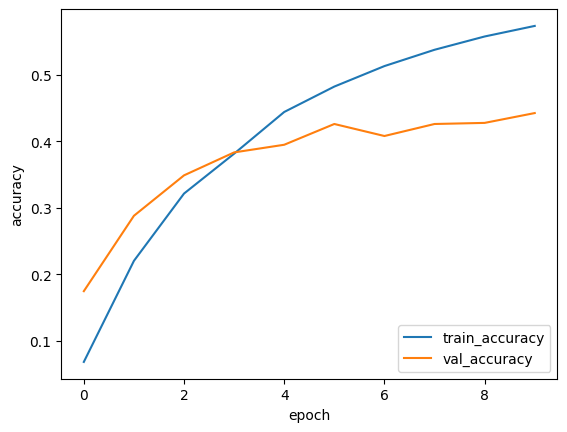

In [93]:

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


### we are noticing some overfitting, introduce small dropout before the output layer

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 31s 100ms/step - accuracy: 0.0178 - loss: 4.5641

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.0179 - loss: 4.5634 - val_accuracy: 0.1250 - val_loss: 3.7991
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 104ms/step - accuracy: 0.1193 - loss: 3.9096 - val_accuracy: 0.2319 - val_loss: 3.1681
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.1987 - loss: 3.4351 - val_accuracy: 0.2878 - val_loss: 2.8771
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 104ms/step - accuracy: 0.2672 - loss: 3.1324 - val_accuracy: 0.3059 - val_loss: 2.7427
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 34s 117ms/step - accuracy: 0.3005 - loss: 2.9106 - val_accuracy: 0.3569 - val_loss: 2.5966
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - accuracy: 0.3362 - loss: 2.7595 - val_accuracy: 0.3618 - val_loss: 2.6095
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 34s 116ms/step - accuracy: 0.3713 - loss: 2.6537 - val_accuracy: 0.3766 - val_loss: 2.5293
Epoch 8/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 34s 114ms/step - accuracy: 0.3883 - loss: 2.5245 - val

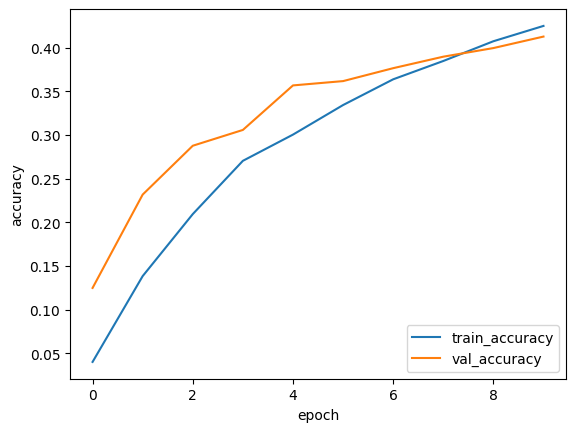

In [94]:

# model with dropout 0.2
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


### overfitting seems to be fixed thanks to the dropout layer, increase the number of epochs to see if the accuracy keeps increasing

### let's now come up with a more complex network to see if that also helps further increase the accuracy of the model, let's add an extra dense layer and also more dropout layers 

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 58s 215ms/step - accuracy: 0.0434 - loss: 4.8445

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 219ms/step - accuracy: 0.0435 - loss: 4.8426 - val_accuracy: 0.0066 - val_loss: 9.1496
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 202ms/step - accuracy: 0.1677 - loss: 3.6809 - val_accuracy: 0.0148 - val_loss: 6.8195
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 223ms/step - accuracy: 0.2577 - loss: 3.2021 - val_accuracy: 0.1118 - val_loss: 4.4124
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 212ms/step - accuracy: 0.3205 - loss: 2.9001 - val_accuracy: 0.2714 - val_loss: 3.2695
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 55s 210ms/step - accuracy: 0.3761 - loss: 2.6461 - val_accuracy: 0.3125 - val_loss: 2.8597
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 55s 209ms/step - accuracy: 0.4069 - loss: 2.4904 - val_accuracy: 0.3586 - val_loss: 2.6487
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 55s 207ms/step - accuracy: 0.4593 - loss: 2.2362 - val_accuracy: 0.3947 - val_loss: 2.4244
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 203ms/step - accuracy: 0.4947 - loss: 2.0570 - val

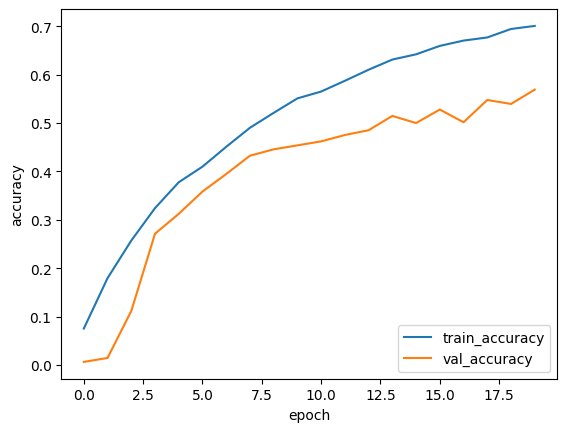

In [95]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),  # higher dropout to regularize

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


### seems like we're going in the right direction, let's now implement a dynamic learning rate

Epoch 1/35


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 58s 209ms/step - accuracy: 0.0306 - loss: 5.2254

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 213ms/step - accuracy: 0.0307 - loss: 5.2238 - val_accuracy: 0.0115 - val_loss: 8.4341
Epoch 2/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - accuracy: 0.0958 - loss: 4.2045 - val_accuracy: 0.0099 - val_loss: 7.3563
Epoch 3/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - accuracy: 0.1602 - loss: 3.7388 - val_accuracy: 0.0641 - val_loss: 5.2454
Epoch 4/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 212ms/step - accuracy: 0.2350 - loss: 3.2962 - val_accuracy: 0.1678 - val_loss: 3.5367
Epoch 5/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - accuracy: 0.2912 - loss: 2.9538 - val_accuracy: 0.2484 - val_loss: 3.0649
Epoch 6/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 212ms/step - accuracy: 0.3370 - loss: 2.7270 - val_accuracy: 0.3092 - val_loss: 2.7211
Epoch 7/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - accuracy: 0.3783 - loss: 2.5063 - val_accuracy: 0.4079 - val_loss: 2.1981
Epoch 8/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - accuracy: 0.4169 - loss: 2.3487 - val

2024-11-22 18:23:25.901799: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 212ms/step - accuracy: 0.7451 - loss: 0.9673 - val_accuracy: 0.5789 - val_loss: 1.4435
Epoch 30/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - accuracy: 0.7484 - loss: 0.9243 - val_accuracy: 0.6069 - val_loss: 1.4266
Epoch 31/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 211ms/step - accuracy: 0.7497 - loss: 0.9505 - val_accuracy: 0.6118 - val_loss: 1.3539
Epoch 32/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 212ms/step - accuracy: 0.7535 - loss: 0.9092 - val_accuracy: 0.5789 - val_loss: 1.5592
Epoch 33/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 215ms/step - accuracy: 0.7749 - loss: 0.8081 - val_accuracy: 0.6283 - val_loss: 1.3792
Epoch 34/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 218ms/step - accuracy: 0.7582 - loss: 0.8703 - val_accuracy: 0.6036 - val_loss: 1.5188
Epoch 35/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 217ms/step - accuracy: 0.7755 - loss: 0.8226 - val_accuracy: 0.6184 - val_loss: 1.3431
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step
accuracy: 74.36%

precision, recall, F1 score 

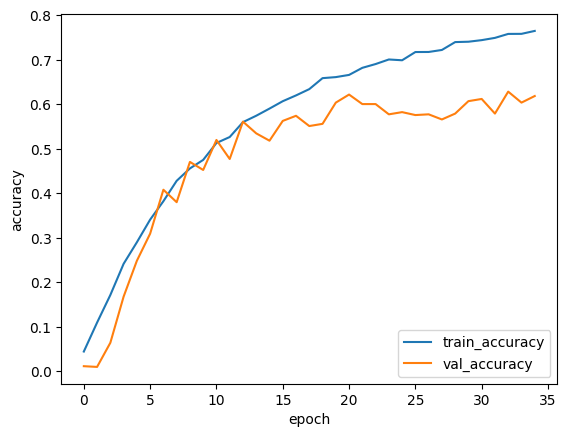

In [96]:
# this is the same as the model right above but with a changing learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),  

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5000,
    decay_rate=0.95)

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=35, validation_data=val_data)

print_results()


### let's double the units of every layer

Epoch 1/35


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 145s 593ms/step - accuracy: 0.0385 - loss: 5.2053

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 147s 603ms/step - accuracy: 0.0386 - loss: 5.2036 - val_accuracy: 0.0099 - val_loss: 10.6976
Epoch 2/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 144s 600ms/step - accuracy: 0.1171 - loss: 4.1726 - val_accuracy: 0.0214 - val_loss: 8.9424
Epoch 3/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 144s 599ms/step - accuracy: 0.2065 - loss: 3.5002 - val_accuracy: 0.1069 - val_loss: 4.6780
Epoch 4/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 144s 600ms/step - accuracy: 0.2818 - loss: 3.0777 - val_accuracy: 0.4062 - val_loss: 2.3730
Epoch 5/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 143s 598ms/step - accuracy: 0.3595 - loss: 2.6430 - val_accuracy: 0.4161 - val_loss: 2.2693
Epoch 6/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 144s 601ms/step - accuracy: 0.4142 - loss: 2.3685 - val_accuracy: 0.4276 - val_loss: 2.2708
Epoch 7/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 144s 601ms/step - accuracy: 0.4778 - loss: 2.1066 - val_accuracy: 0.4605 - val_loss: 2.0725
Epoch 8/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 144s 603ms/step - accuracy: 0.5177 - loss: 1.9

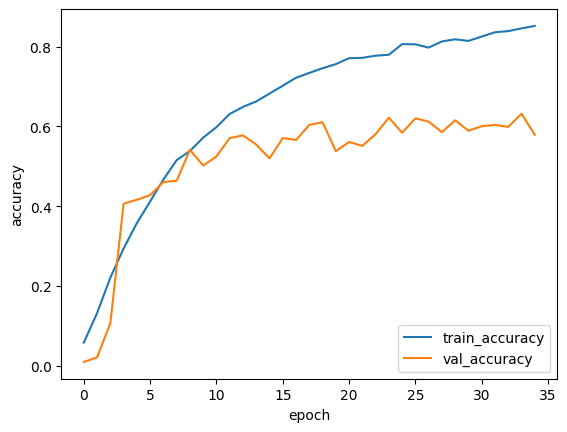

In [97]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),  

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5000,
    decay_rate=0.95)

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=35, validation_data=val_data)

print_results()


Epoch 1/35


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 57s 206ms/step - accuracy: 0.0203 - loss: 5.3826

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 210ms/step - accuracy: 0.0203 - loss: 5.3810 - val_accuracy: 0.0181 - val_loss: 10.0751
Epoch 2/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 210ms/step - accuracy: 0.0589 - loss: 4.4545 - val_accuracy: 0.0148 - val_loss: 8.9538
Epoch 3/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 226ms/step - accuracy: 0.1036 - loss: 4.0276 - val_accuracy: 0.0148 - val_loss: 8.5668
Epoch 4/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 60s 229ms/step - accuracy: 0.1339 - loss: 3.8197 - val_accuracy: 0.0197 - val_loss: 7.0446
Epoch 5/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 220ms/step - accuracy: 0.1712 - loss: 3.6101 - val_accuracy: 0.0214 - val_loss: 6.5070
Epoch 6/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 226ms/step - accuracy: 0.1882 - loss: 3.4437 - val_accuracy: 0.0329 - val_loss: 5.9855
Epoch 7/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 220ms/step - accuracy: 0.2269 - loss: 3.2427 - val_accuracy: 0.0444 - val_loss: 5.5704
Epoch 8/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - accuracy: 0.2557 - loss: 3.1150 - va

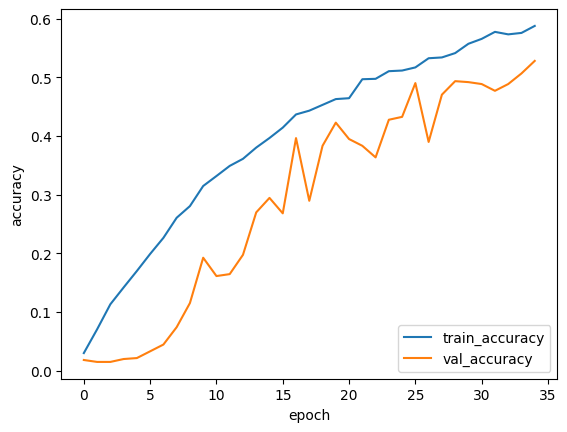

In [98]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5), 

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5), 

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5), 

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),  

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5000,
    decay_rate=0.95)

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=35, validation_data=val_data)

print_results()


### seems like that didn't help...

### let's finally test with a static learning rate but more epochs

Epoch 1/50


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 56s 203ms/step - accuracy: 0.0374 - loss: 5.0648

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 207ms/step - accuracy: 0.0375 - loss: 5.0631 - val_accuracy: 0.0066 - val_loss: 8.2378
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 212ms/step - accuracy: 0.1234 - loss: 4.0210 - val_accuracy: 0.0132 - val_loss: 9.2681
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 215ms/step - accuracy: 0.2158 - loss: 3.4249 - val_accuracy: 0.0921 - val_loss: 4.5889
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 218ms/step - accuracy: 0.2750 - loss: 3.0882 - val_accuracy: 0.2747 - val_loss: 2.9967
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 211ms/step - accuracy: 0.3359 - loss: 2.8192 - val_accuracy: 0.3207 - val_loss: 2.7868
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 55s 207ms/step - accuracy: 0.3793 - loss: 2.6077 - val_accuracy: 0.2895 - val_loss: 3.3071
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 205ms/step - accuracy: 0.4236 - loss: 2.4068 - val_accuracy: 0.4424 - val_loss: 2.2290
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 206ms/step - accuracy: 0.4599 - loss: 2.2434 - val

2024-11-22 21:20:52.811661: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 205ms/step - accuracy: 0.8190 - loss: 0.6534 - val_accuracy: 0.5987 - val_loss: 1.5357
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step
accuracy: 71.64%

precision, recall, F1 score for each class:
accordion: Precision=0.83, Recall=0.80, F1 Score=0.82
airplanes: Precision=0.99, Recall=0.78, F1 Score=0.87
anchor: Precision=0.29, Recall=0.42, F1 Score=0.34
ant: Precision=0.21, Recall=0.50, F1 Score=0.30
barrel: Precision=0.26, Recall=0.35, F1 Score=0.30
bass: Precision=0.53, Recall=0.33, F1 Score=0.41
beaver: Precision=0.13, Recall=0.25, F1 Score=0.17
binocular: Precision=0.17, Recall=0.33, F1 Score=0.22
bonsai: Precision=0.83, Recall=0.52, F1 Score=0.64
brain: Precision=0.82, Recall=0.48, F1 Score=0.61
brontosaurus: Precision=0.55, Recall=0.46, F1 Score=0.50
buddha: Precision=0.88, Recall=0.69, F1 Score=0.78
butterfly: Precision=0.76, Recall=0.58, F1 Score=0.66
camera: Precision=0.57, Recall=0.60, F1 Score=0.59
cannon: Precision=0.14, Recall=0.25, F1 Score=0.18

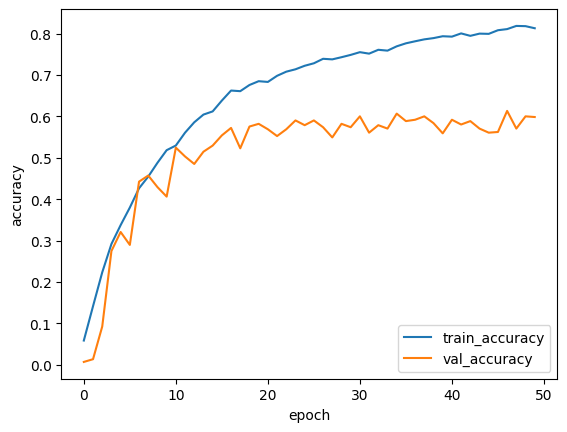

In [99]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=50, validation_data=val_data)

print_results()


Epoch 1/50


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 126s 509ms/step - accuracy: 0.0576 - loss: 4.7641

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 128s 519ms/step - accuracy: 0.0577 - loss: 4.7619 - val_accuracy: 0.0214 - val_loss: 5.9877
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 126s 519ms/step - accuracy: 0.2011 - loss: 3.5124 - val_accuracy: 0.0888 - val_loss: 4.6303
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 118s 482ms/step - accuracy: 0.2921 - loss: 3.0480 - val_accuracy: 0.3372 - val_loss: 2.8837
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 117s 481ms/step - accuracy: 0.3517 - loss: 2.7293 - val_accuracy: 0.4424 - val_loss: 2.2157
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 115s 475ms/step - accuracy: 0.4208 - loss: 2.4432 - val_accuracy: 0.3914 - val_loss: 2.3945
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 118s 486ms/step - accuracy: 0.4312 - loss: 2.3288 - val_accuracy: 0.4128 - val_loss: 2.4009
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 117s 481ms/step - accuracy: 0.4828 - loss: 2.0897 - val_accuracy: 0.4375 - val_loss: 2.2108
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 117s 482ms/step - accuracy: 0.4810 - loss: 2.11

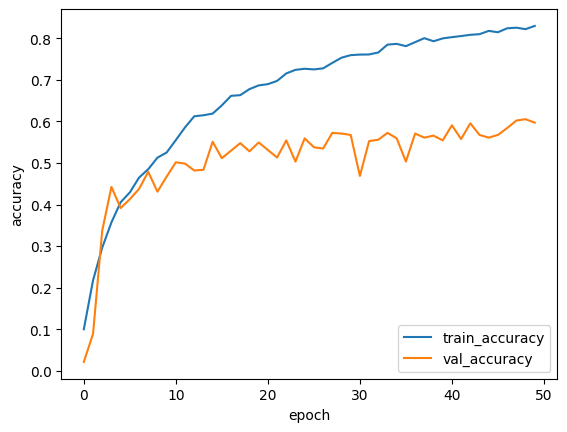

In [100]:
# Model architecture
model = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer for 101 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=50, validation_data=val_data)

print_results()

### Transfer Learning

In [101]:
# Load pre-trained MobileNetV2 base model
from tensorflow.keras.applications import MobileNetV2

model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
model.trainable = False  # Freeze base model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=5, validation_data=val_data)

print_results()



Epoch 1/5


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "Conv1" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 128, 128, 1)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(32, 128, 128, 1), dtype=float32)
  • training=True
  • mask=None